In [206]:
import pandas as pd

In [207]:
df= pd.read_csv('Converted.csv')

In [208]:
first_few_rows = df.head()

print(first_few_rows)

   leaf_area  leaf_perimeter     b_mean     g_mean     r_mean      b_std  \
0    25722.0     1113.175748  21.336044  26.503662  18.088455  27.914652   
1    30208.5      847.192993  26.486359  45.306808  28.587997  31.875573   
2    23998.0      921.577768  24.509201  45.480637  41.333740  35.769410   
3    31460.5      877.134118  37.146561  52.372208  40.278091  42.333955   
4    33390.0      985.661029  27.546310  35.689087  24.572769  30.883775   

       g_std      r_std  green_ratio  non_green_ratio   contrast  \
0  33.879372  23.818265     0.133621         0.866379  10.253033   
1  50.520429  33.683841     0.456711         0.543289  19.182230   
2  61.694871  57.125603     0.276581         0.723419  33.528707   
3  56.735547  44.569484     0.441833         0.558167  25.981434   
4  37.981185  27.304492     0.222015         0.777985  16.200705   

   dissimilarity  homogeneity    energy  correlation               classlabel  
0       1.356556     0.704949  0.555134     0.993939  

In [209]:
print("\nMissing values in the dataset clean:")
print(df.isnull().sum())


Missing values in the dataset clean:
leaf_area          0
leaf_perimeter     0
b_mean             0
g_mean             0
r_mean             0
b_std              0
g_std              0
r_std              0
green_ratio        0
non_green_ratio    0
contrast           0
dissimilarity      0
homogeneity        0
energy             0
correlation        0
classlabel         0
dtype: int64


In [210]:
# Print columns with 0 values
zero_counts = (df == 0).sum()
print("\nColumns with 0 values:")
print(zero_counts[zero_counts > 0])


Columns with 0 values:
leaf_area         1568
leaf_perimeter     812
green_ratio          2
dtype: int64


In [211]:
# Convert non-numeric columns to NaN
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Calculate row means
row_means = df_numeric.mean(axis=1)

# Impute zero values with row means
df_imputed = df.mask(df == 0, row_means, axis=0)

# Print the DataFrame after imputation
print("\nDataFrame after imputing zero values with row means:")
print(df_imputed)


DataFrame after imputing zero values with row means:
       leaf_area  leaf_perimeter     b_mean     g_mean     r_mean      b_std  \
0        25722.0     1113.175748  21.336044  26.503662  18.088455  27.914652   
1        30208.5      847.192993  26.486359  45.306808  28.587997  31.875573   
2        23998.0      921.577768  24.509201  45.480637  41.333740  35.769410   
3        31460.5      877.134118  37.146561  52.372208  40.278091  42.333955   
4        33390.0      985.661029  27.546310  35.689087  24.572769  30.883775   
...          ...             ...        ...        ...        ...        ...   
15880    16971.5      735.938159  11.465378  21.867889  17.918976  26.675223   
15881    27044.5      676.482317  12.859772  33.414948  23.281097  18.947194   
15882    21570.5      657.854900  10.530807  39.358154  28.969009  19.016169   
15883    19786.5      851.820413   8.872375  39.772278  28.497208  17.424580   
15884    28159.5      706.766589  19.056564  64.281219  49.006470 

In [212]:
unique_categories =  df['classlabel'].unique()

print("Unique categories (diseases) found in the target column 'classlabel':")
for category in unique_categories:
    print(category)

Unique categories (diseases) found in the target column 'classlabel':
Tomato___Bacterial_spot
Tomato___Early_blight
Tomato___healthy
Tomato___Late_blight
Tomato___Leaf_Mold
Tomato___Septoria_leaf_spot
Tomato___Spider_mites Two-spotted_spider_mite
Tomato___Target_Spot
Tomato___Tomato_mosaic_virus
Tomato___Tomato_Yellow_Leaf_Curl_Virus


In [213]:
print("Unique categories (diseases) found in the target column 'classlabel' and their counts:")
for category in unique_categories:
    count = df[df['classlabel'] == category].shape[0]
    print(f"{category}: {count}")

Unique categories (diseases) found in the target column 'classlabel' and their counts:
Tomato___Bacterial_spot: 2127
Tomato___Early_blight: 1000
Tomato___healthy: 1591
Tomato___Late_blight: 1757
Tomato___Leaf_Mold: 952
Tomato___Septoria_leaf_spot: 1771
Tomato___Spider_mites Two-spotted_spider_mite: 1676
Tomato___Target_Spot: 1404
Tomato___Tomato_mosaic_virus: 373
Tomato___Tomato_Yellow_Leaf_Curl_Virus: 3234


In [214]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder


In [215]:
# Identify outliers using z-score method, considering only numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns
z_scores = ((df[numerical_columns] - df[numerical_columns].mean()) / df[numerical_columns].std()).abs()
outliers_mask = (z_scores > 3).any(axis=1)

# Print identified outliers
print("Identified outliers:")
print(df[outliers_mask])

# Option 1: Remove outliers
clean_df = df[~outliers_mask]

Identified outliers:
       leaf_area  leaf_perimeter     b_mean     g_mean     r_mean      b_std  \
178      31354.0      870.808217  30.288086  79.814972  74.731750  34.508250   
185      32084.5      876.991983  52.665085  84.326157  74.702454  55.445928   
280      31474.0      772.264060  29.242676  88.267303  78.491882  32.337656   
460      45316.0     1056.347320  50.840897  68.652161  46.505539  38.678042   
1084     31871.0      749.862040  37.084427  80.869339  71.055847  39.378330   
...          ...             ...        ...        ...        ...        ...   
15786    34945.0      806.607205  16.624817  87.972885  63.411163  22.442830   
15793    36849.5      803.050858  22.021286  90.683945  66.526718  25.675352   
15826    27191.5      737.251869  13.822769  23.551971  18.927551  26.632115   
15855    35585.0      789.009227  18.079773  88.882431  64.433823  23.329576   
15872     1354.5      161.296463   0.877640   3.193237   2.479538   7.317414   

           g_std  

In [216]:
le = LabelEncoder()
clean_df['classlabel'] = le.fit_transform(clean_df['classlabel'])

C:\Users\abdul\AppData\Local\Temp\ipykernel_24284\4101423859.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['classlabel'] = le.fit_transform(clean_df['classlabel'])


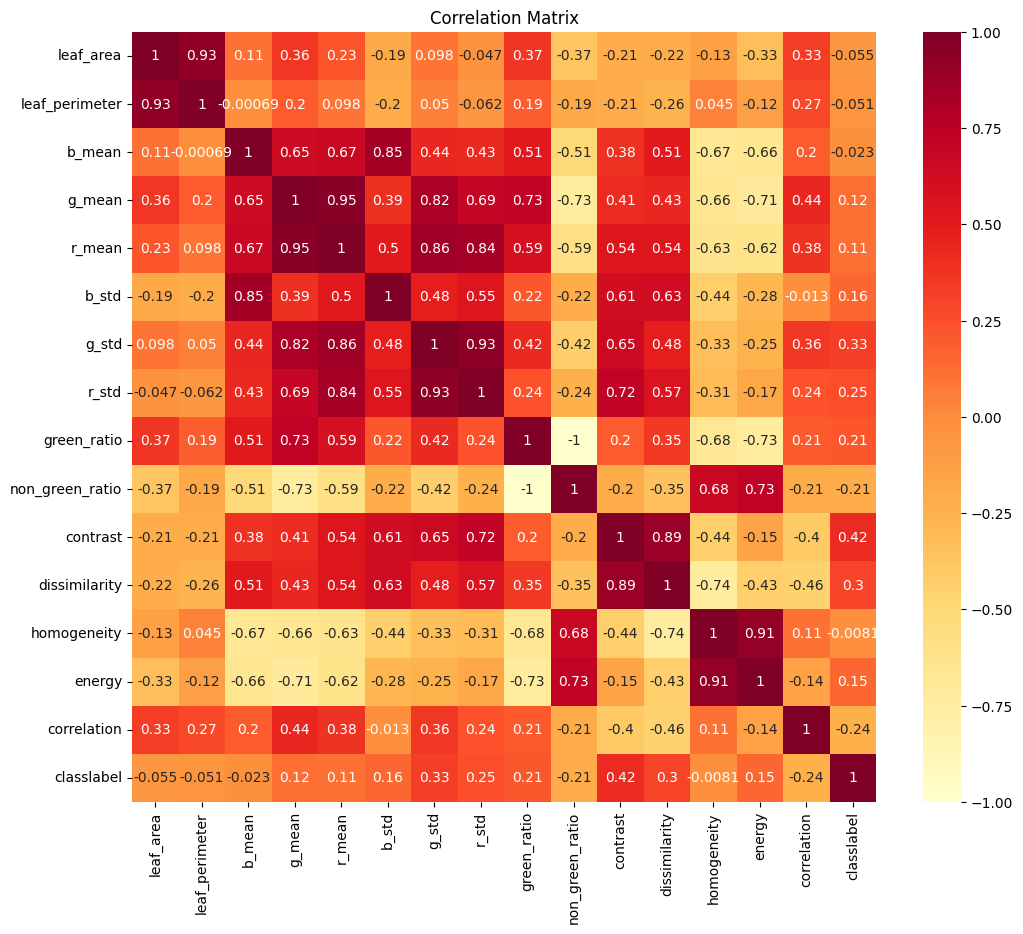

In [217]:
# Plot the correlation matrix
plt.figure(figsize=(12, 10))
corr_matrix = clean_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd')
plt.title('Correlation Matrix')
plt.show()


In [218]:
# Perform feature selection using Recursive Feature Elimination (RFE)
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=10)
rfe = rfe.fit(clean_df.drop('classlabel', axis=1), clean_df['classlabel'])

C:\Users\abdul\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\abdul\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

In [219]:
# Print the ranking of the features
print('Feature Ranking:')
print(rfe.ranking_)

Feature Ranking:
[1 1 1 1 1 1 1 1 6 4 1 1 5 3 2]


In [220]:
# Get the feature names
feature_names = clean_df.columns[:-1]  # Assume the last column is the target variable

# Get the ranked feature names
ranked_features = [feature_names[i] for i in range(len(rfe.ranking_)) if rfe.ranking_[i] == 1]

print('Selected Features:', ranked_features)

Selected Features: ['leaf_area', 'leaf_perimeter', 'b_mean', 'g_mean', 'r_mean', 'b_std', 'g_std', 'r_std', 'contrast', 'dissimilarity']


In [221]:
X = clean_df[['leaf_area', 'leaf_perimeter', 'b_mean', 'g_mean', 'r_mean', 'b_std', 'g_std', 'r_std', 'contrast', 'dissimilarity']]
#X = clean_df.drop(columns=['classlabel'])
y = clean_df['classlabel']

if 'classlabel' in X:
    print("Error: 'classlabel' column is included in X, which is unexpected.")
else:
    print("No error: 'classlabel' column is not included in X as expected.")

No error: 'classlabel' column is not included in X as expected.


In [222]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_encoded)

# Convert back to original labels
y_resampled = le.inverse_transform(y_resampled)

# Create a new dataframe with balanced classes
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['classlabel'] = y_resampled

new_X = df_resampled.drop(columns=['classlabel'])

In [223]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(new_X)

In [224]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [226]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X_pca, y_resampled, test_size=0.2, random_state=42)


In [227]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Random Forest Accuracy: 0.8562398703403565
Number of features used in training: 10
10
Feature 1: leaf_area - Importance: 0.12022140260436145
Feature 2: leaf_perimeter - Importance: 0.11996410354222449
Feature 3: b_mean - Importance: 0.13295142587188197
Feature 4: g_mean - Importance: 0.08248008724404432
Feature 5: r_mean - Importance: 0.11357716621813511
Feature 6: b_std - Importance: 0.1084752634463644
Feature 7: g_std - Importance: 0.0802489887455489
Feature 8: r_std - Importance: 0.07058416563590904
Feature 9: contrast - Importance: 0.08562996550395549
Feature 10: dissimilarity - Importance: 0.08586743118757477


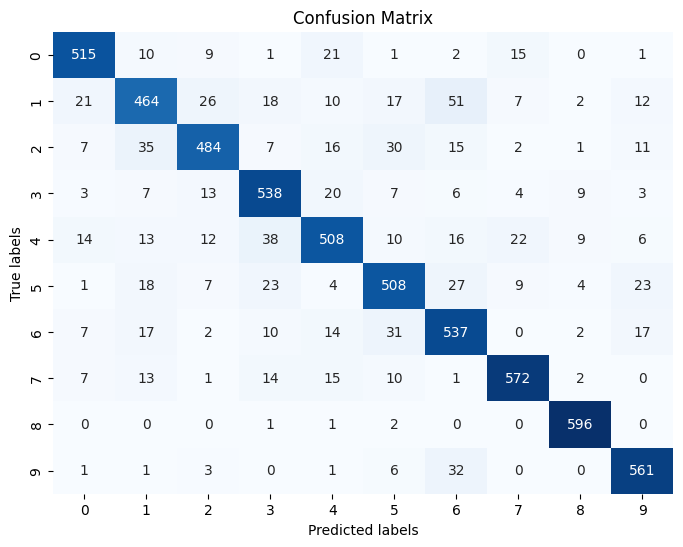

Random Forest model saved successfully at: C:\Users\abdul\Desktop\Foliar research\Random Forest Model\random_forest_model.joblib


In [228]:
from sklearn.ensemble import RandomForestClassifier
import joblib
import numpy as np

model = RandomForestClassifier()
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print("Random Forest Accuracy:", accuracy)

# Get the number of features/columns used
num_features =  X_train.shape[1]
print("Number of features used in training:", num_features)
print(X_train.shape[1])

# Now, you can proceed to check the accuracy
accuracy = model.score(X_test, y_test)

# Get feature importances
feature_importances = model.feature_importances_

# Print feature importances along with feature names
for i, (feature, importance) in enumerate(zip(X.columns, feature_importances)):
    print("Feature {}: {} - Importance: {}".format(i+1, feature, importance))

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

try:
    # Save the model
    model_save_path = r"C:\Users\abdul\Desktop\Foliar research\Random Forest Model\random_forest_model.joblib"
    joblib.dump(model, model_save_path)
    print("Random Forest model saved successfully at:", model_save_path)
except Exception as e:
    print("Error occurred while saving the model:", e)
    


Decision Tree Accuracy: 0.7183144246353322


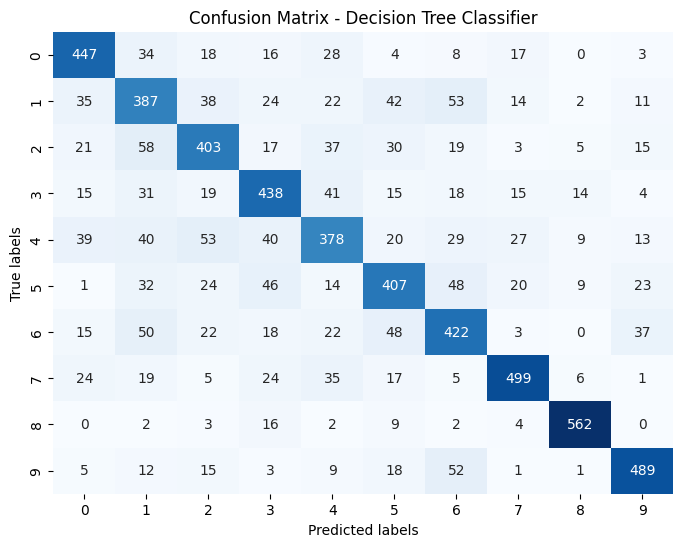

In [229]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_accuracy = dt_model.score(X_test, y_test)
print("Decision Tree Accuracy:", dt_accuracy)

# Predict the labels for the test set
y_pred_dt = dt_model.predict(X_test)

# Generate confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Plot confusion matrix for Decision Tree Classifier
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()

SVM Accuracy: 0.713128038897893


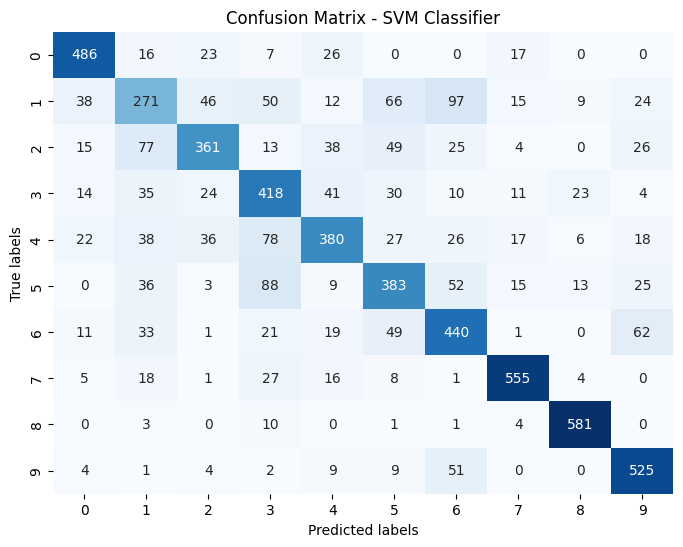

In [230]:
# Support Vector Machine (SVM)
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_accuracy = svm_model.score(X_test, y_test)
print("SVM Accuracy:", svm_accuracy)

# Predict the labels for the test set
y_pred_svm = svm_model.predict(X_test)

# Generate confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix for SVM Classifier
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - SVM Classifier')
plt.show()

XGBoost Accuracy: 0.8392220421393841


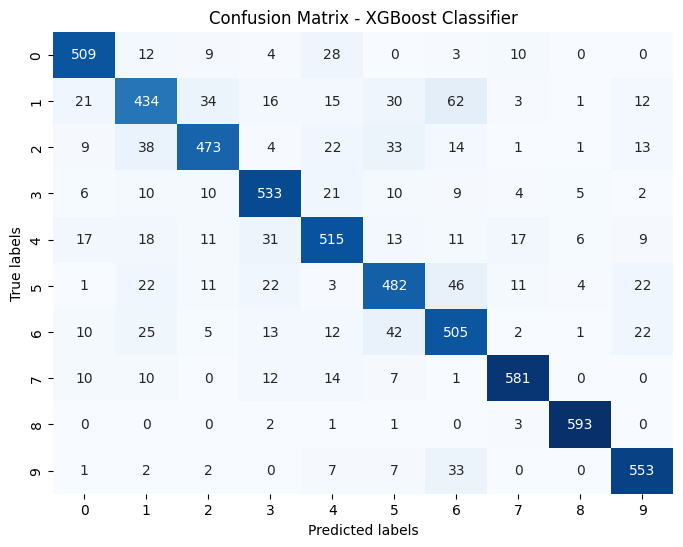

In [231]:
import xgboost as xgb

# Define the XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Train the model
xgb_model.fit(X_train, y_train)

# Evaluate accuracy
xgb_accuracy = xgb_model.score(X_test, y_test)
print("XGBoost Accuracy:", xgb_accuracy)

# Predict the labels for the test set
y_pred_xgb = xgb_model.predict(X_test)

# Generate confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot confusion matrix for XGBoost Classifier
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - XGBoost Classifier')
plt.show()

CatBoost Accuracy: 0.8380875202593193


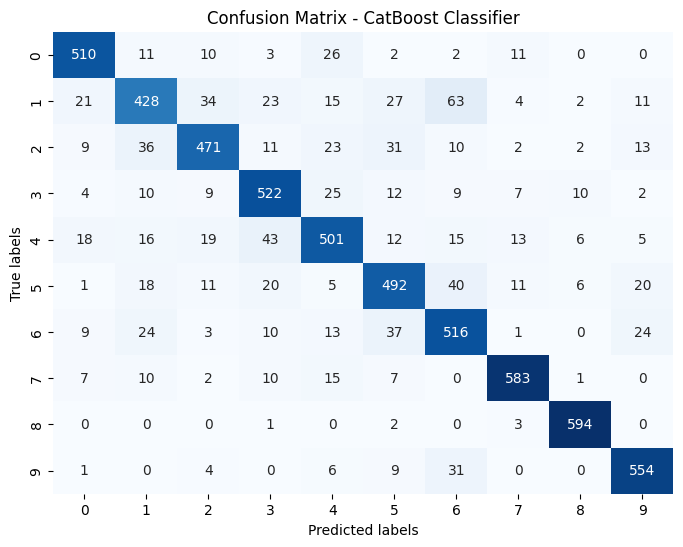

CatBoost model saved successfully at: C:\Users\abdul\Desktop\Foliar research\Catboost Model\catboost_model.joblib


In [232]:
from catboost import CatBoostClassifier
import joblib


# Define the CatBoost classifier
catboost_model = CatBoostClassifier()

# Train the model
catboost_model.fit(X_train, y_train, verbose=False)  # Set verbose=True for training log

# Evaluate accuracy
catboost_accuracy = catboost_model.score(X_test, y_test)
print("CatBoost Accuracy:", catboost_accuracy)

# Predict the labels for the test set
y_pred_catboost = catboost_model.predict(X_test)

# Generate confusion matrix
conf_matrix_catboost = confusion_matrix(y_test, y_pred_catboost)

# Plot confusion matrix for CatBoost Classifier
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_catboost, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - CatBoost Classifier')
plt.show()

# Save the model
model_save_path = r"C:\Users\abdul\Desktop\Foliar research\Catboost Model\catboost_model.joblib"
joblib.dump(catboost_model, model_save_path)

print("CatBoost model saved successfully at:", model_save_path)

In [233]:
from sklearn.model_selection import cross_val_score

# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)  # 5-fold cross-validation
rf_mean_cv_accuracy = rf_cv_scores.mean()
print("Random Forest Cross-Validation Accuracy:", rf_mean_cv_accuracy)

# Decision Tree Classifier
dt_model = DecisionTreeClassifier()
dt_cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5)
dt_mean_cv_accuracy = dt_cv_scores.mean()
print("Decision Tree Cross-Validation Accuracy:", dt_mean_cv_accuracy)

# Support Vector Machine (SVM)
svm_model = SVC()
svm_cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5)
svm_mean_cv_accuracy = svm_cv_scores.mean()
print("SVM Cross-Validation Accuracy:", svm_mean_cv_accuracy)

# XGBoost Classifier
xgb_model = xgb.XGBClassifier()
xgb_cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5)
xgb_mean_cv_accuracy = xgb_cv_scores.mean()
print("XGBoost Cross-Validation Accuracy:", xgb_mean_cv_accuracy)

# CatBoost Classifier
catboost_model = CatBoostClassifier(verbose=False)
catboost_cv_scores = cross_val_score(catboost_model, X_train, y_train, cv=5)
catboost_mean_cv_accuracy = catboost_cv_scores.mean()
print("CatBoost Cross-Validation Accuracy:", catboost_mean_cv_accuracy)


Random Forest Cross-Validation Accuracy: 0.8441247974068071
Decision Tree Cross-Validation Accuracy: 0.7097649918962723
SVM Cross-Validation Accuracy: 0.7221231766612641
XGBoost Cross-Validation Accuracy: 0.8243922204213939
CatBoost Cross-Validation Accuracy: 0.8316855753646678
